<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.5 Naive Bayes</h2>

<ul>
    <li>Bayes Theorem</li>
    <li>Laplace Smoothing</li>
    <li>Bayes Model in Predicted Analytics</li>
    <li>Naive Bayes Model</li>
</ul>

<h3 style = 'color:lightgreen'>1.5.0 Import Libraries</h3>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.feature_extraction.text import CountVectorizer

<h3 style = 'color:lightgreen'>1.5.1 Bayes Theorem</h3>

<h4 style = 'color:green'>1.5.1.1 Fundamentals of Bayes Theorem</h4>

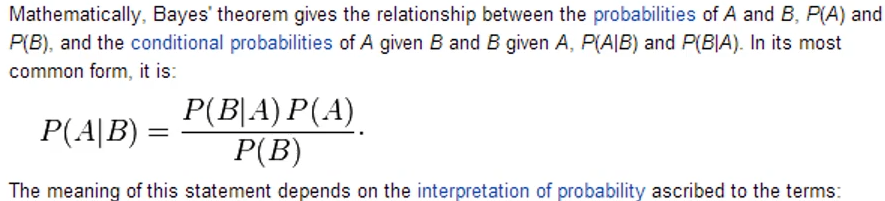

In [5]:
Image("../3. Images/Bayes Theorem - 1.png", width=500, height=500)

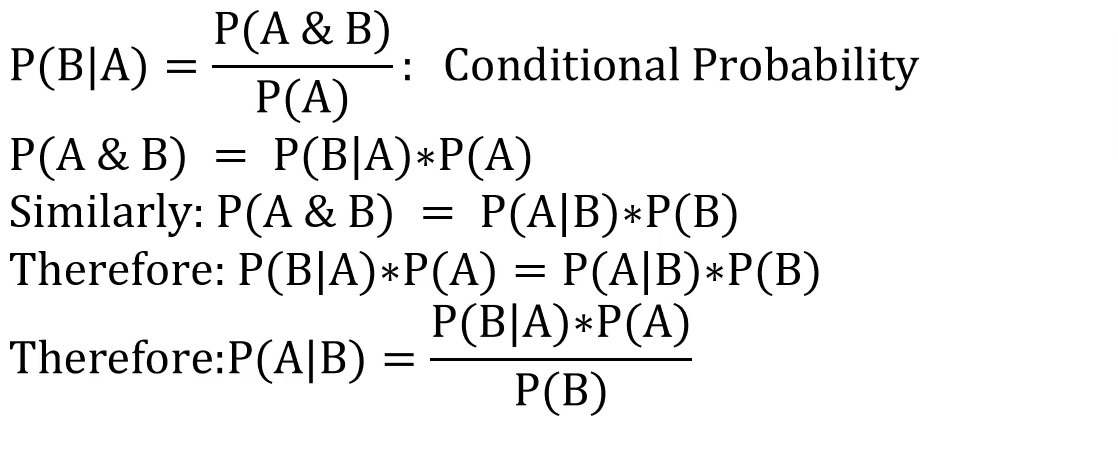

In [7]:
Image("../3. Images/Bayes Theorem - 2.png", width=500, height=500)

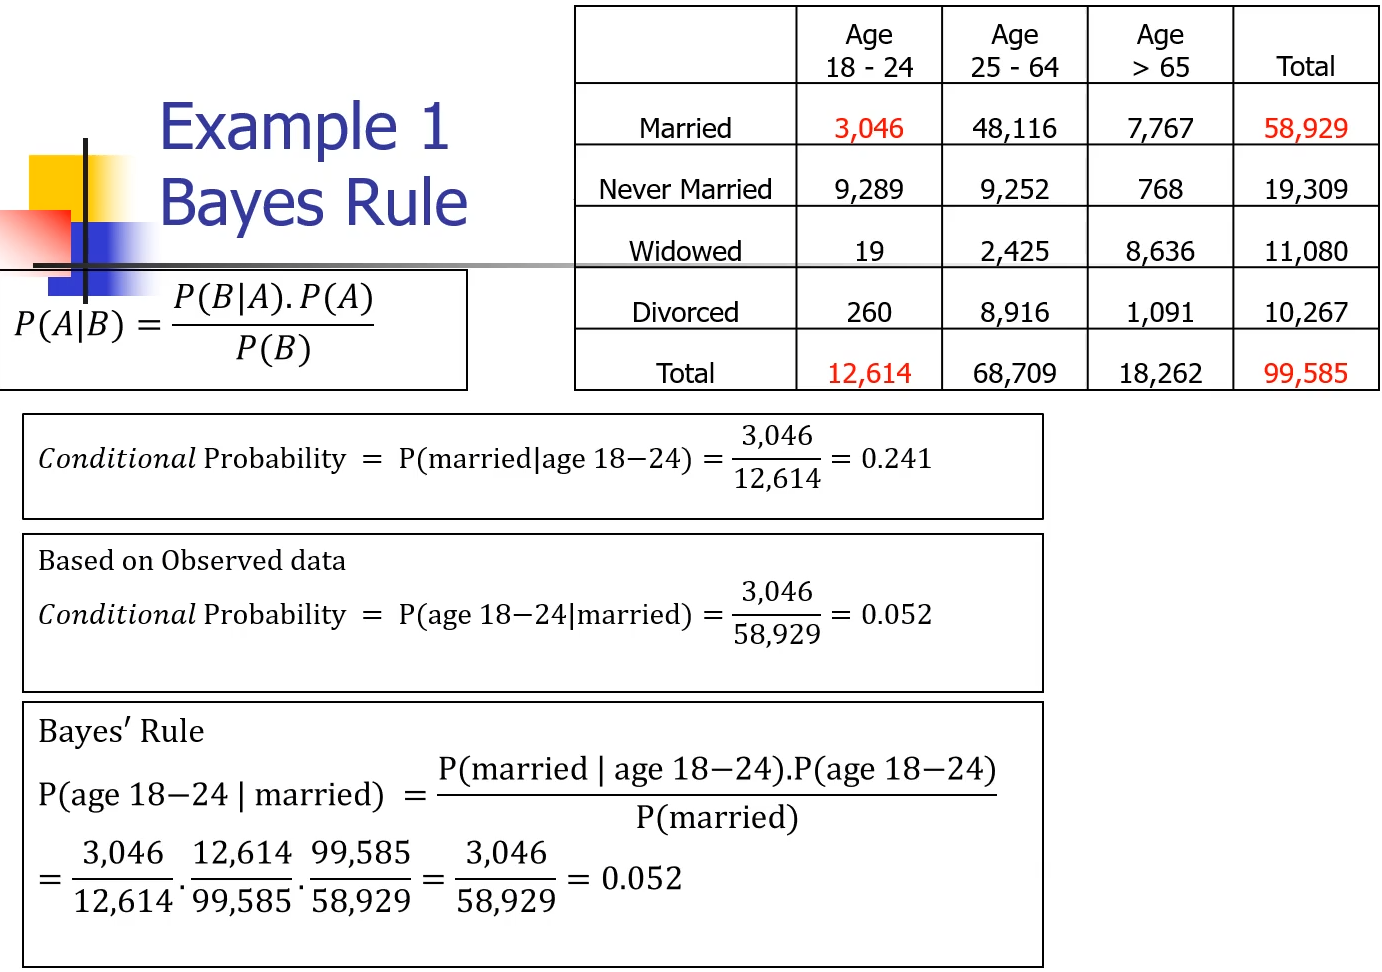

In [8]:
Image("../3. Images/Bayes Theorem - 3.png", width=500, height=500)

In [41]:
data = {
    'Age [18 - 24]': [3046, 9283, 19, 260],
    'Age [25 - 64]': [48116, 9252, 2425, 8916],
    'Age [65+]': [7767, 768, 8636, 1091]
}

df = pd.DataFrame(data, index=['Married', 'Never Married', 'Widowed', 'Divorced'])
df

Age [18 - 24]  Age [25 - 64]  Age [65+]
Married                 3046          48116       7767
Never Married           9283           9252        768
Widowed                   19           2425       8636
Divorced                 260           8916       1091

In [42]:
def conditional_probability(probability_A, given_B):
    return (probability_A / np.array(given_B).sum())

In [43]:
print(f"Probability of being married given that you are 18-24 years old: {conditional_probability(df['Age [18 - 24]']['Married'], df['Age [18 - 24]'].to_list()):.4f}")

Probability of being married given that you are 18-24 years old: 0.2416


In [44]:
# Let's calculate each of the probabilities and create a new DataFrame

probabilities = {
    '18 - 24': [conditional_probability(df.loc['Married', 'Age [18 - 24]'], df.loc['Married', :].to_list()),
                conditional_probability(df.loc['Never Married', 'Age [18 - 24]'], df.loc['Never Married', :].to_list()),
                conditional_probability(df.loc['Widowed', 'Age [18 - 24]'], df.loc['Widowed', :].to_list()),
                conditional_probability(df.loc['Divorced', 'Age [18 - 24]'], df.loc['Divorced', :].to_list())],
    '25 - 64': [conditional_probability(df.loc['Married', 'Age [25 - 64]'], df.loc['Married', :].to_list()),
                conditional_probability(df.loc['Never Married', 'Age [25 - 64]'], df.loc['Never Married', :].to_list()),
                conditional_probability(df.loc['Widowed', 'Age [25 - 64]'], df.loc['Widowed', :].to_list()),
                conditional_probability(df.loc['Divorced', 'Age [25 - 64]'], df.loc['Divorced', :].to_list())],
    '65+': [conditional_probability(df.loc['Married', 'Age [65+]'], df.loc['Married', :].to_list()),
            conditional_probability(df.loc['Never Married', 'Age [65+]'], df.loc['Never Married', :].to_list()),
            conditional_probability(df.loc['Widowed', 'Age [65+]'], df.loc['Widowed', :].to_list()),
            conditional_probability(df.loc['Divorced', 'Age [65+]'], df.loc['Divorced', :].to_list())]
}

df_probabilities = pd.DataFrame(probabilities, index=['Married', 'Never Married', 'Widowed', 'Divorced'])
df_probabilities

18 - 24   25 - 64       65+
Married        0.051689  0.816508  0.131803
Never Married  0.480910  0.479304  0.039787
Widowed        0.001715  0.218863  0.779422
Divorced       0.025324  0.868413  0.106263

<b>Bayes Rule</b> allows us to calculate the reverse probability, which is also known as posterior probability.

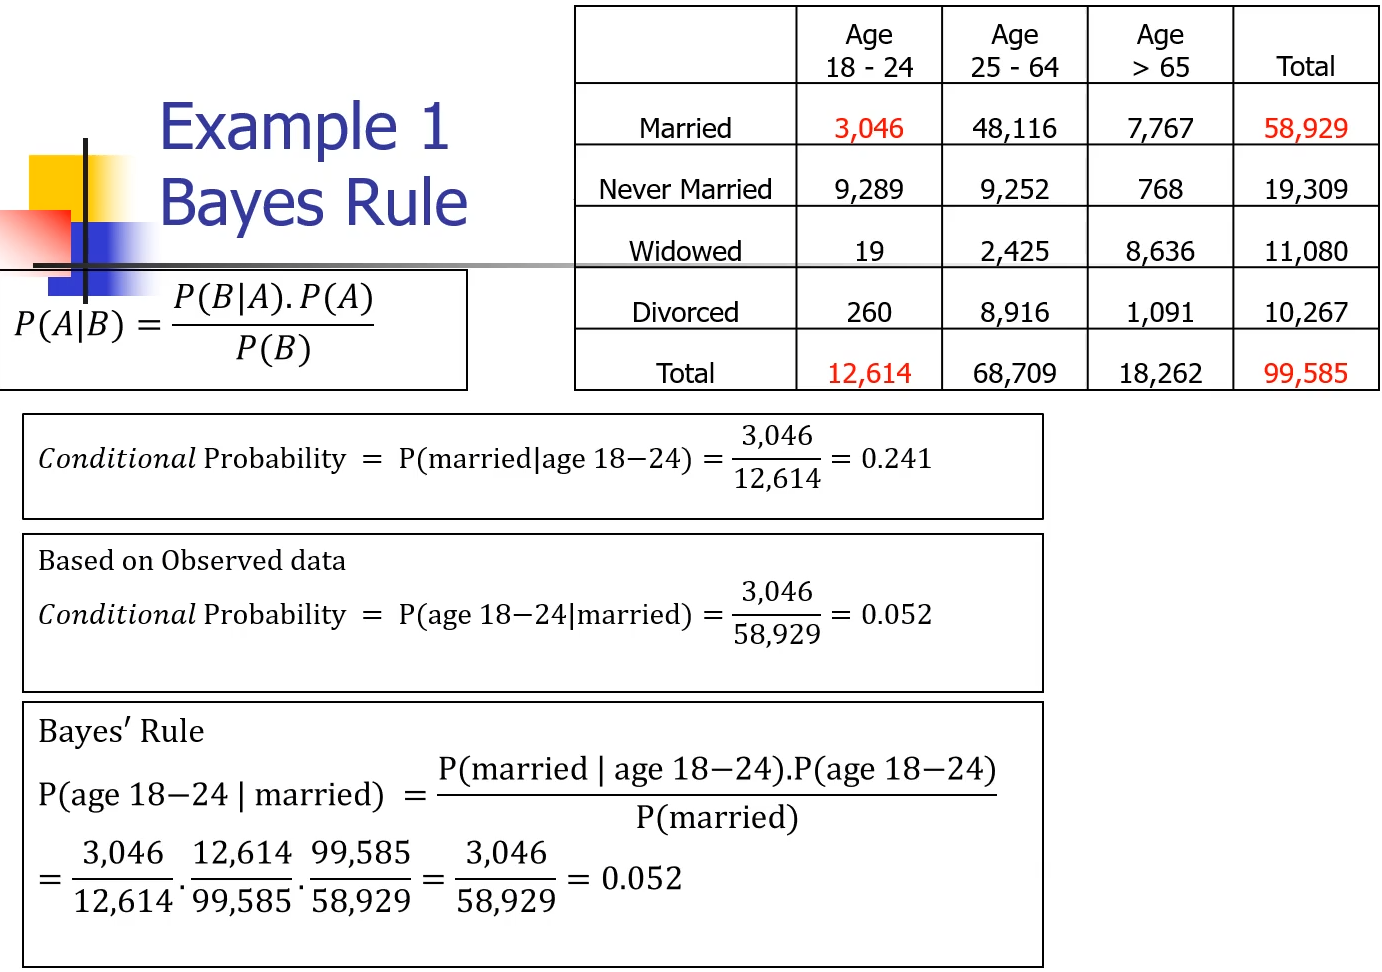

In [47]:
Image("../3. Images/Bayes Theorem - 3.png", width=500, height=500)

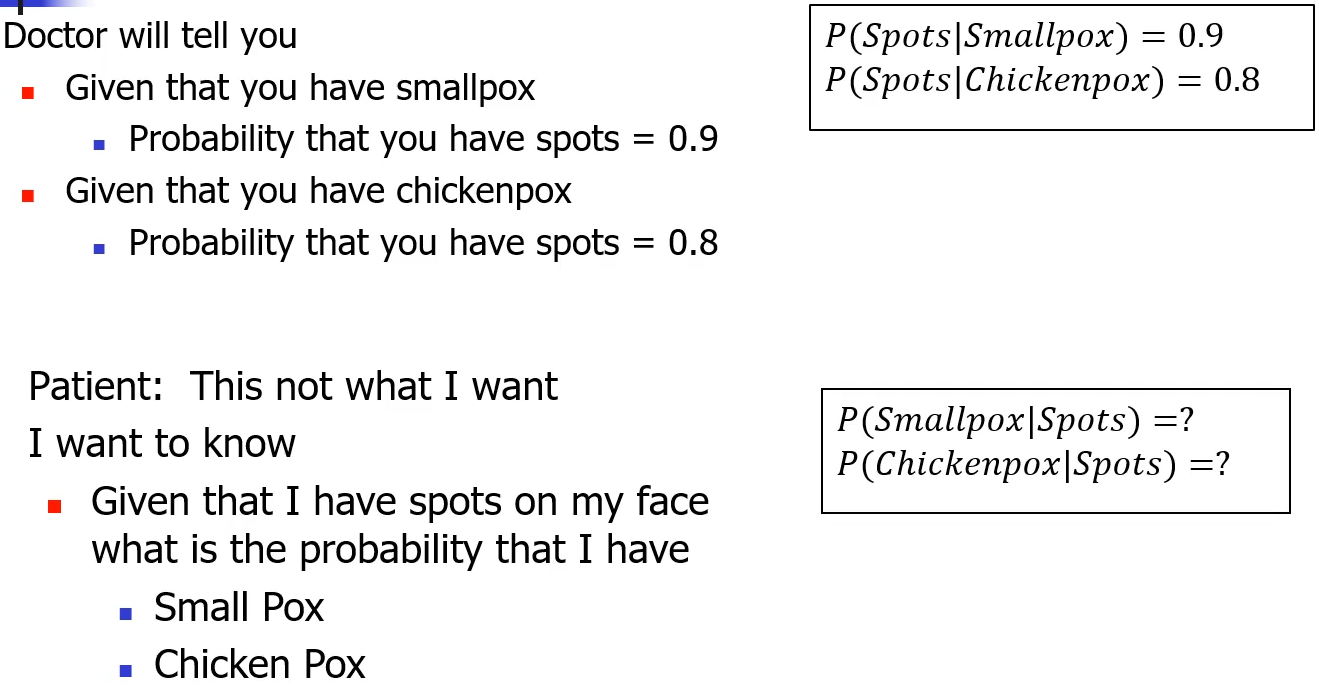

In [48]:
Image("../3. Images/Bayes Theorem - 5.png", width=500, height=500)

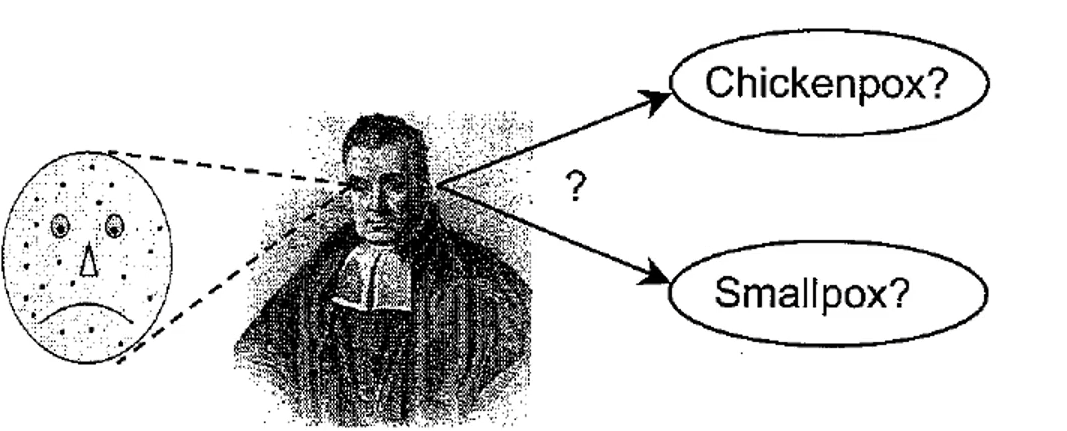

In [49]:
Image("../3. Images/Bayes Theorem - 6.png", width=500, height=500)

In [62]:
# Let's calculate Bayes Probability that will tell us given a person has spots on their face, what is the probability that they have small pox
Probability_Spots_Given_SmallPox = 0.9
Probability_Spots_Given_ChickenPox = 0.8
Probability_Spots = 0.081 # 81 out of 1000 people have spots on their face
Probability_SmallPox = 0.001 # 1 out of 1,000 people have small pox (Very Rare)
Probability_ChickenPox = 0.1 # 100 out of 1,000 people have chicken pox

# Therefore, the probability of having small pox given that you have spots on your face is:
Probability_SmallPox_given_Spots = (Probability_Spots_Given_SmallPox * Probability_SmallPox) / Probability_Spots
print("Probability of having smallpox given spots on the face:", Probability_SmallPox_given_Spots)

# Probability of having chickenpox given that someone has spots on their face
Probability_ChickenPox_given_Spots = (Probability_Spots_Given_ChickenPox * Probability_ChickenPox) / Probability_Spots
print("Probability of having chickenpox given spots on the face:", Probability_ChickenPox_given_Spots)

Probability of having smallpox given spots on the face: 0.011111111111111112
Probability of having chickenpox given spots on the face: 0.9876543209876545


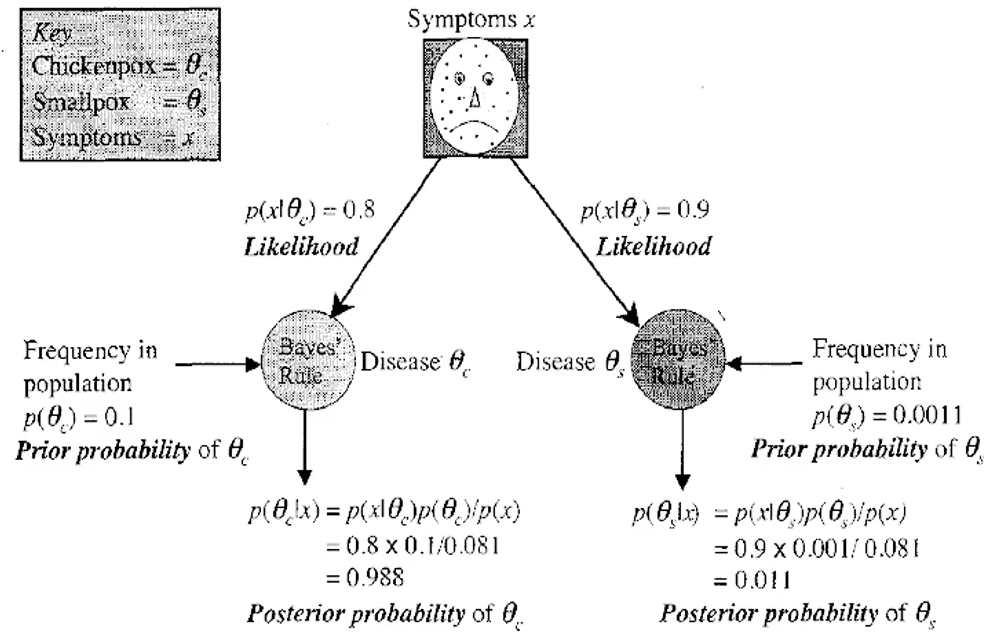

In [54]:
Image("../3. Images/Bayes Theorem - 7.png", width=500, height=500)

<b>Theorem of Total Probability</b>: It allows us to calculate individual probabilities given conditional probabilities.

<h4 style = 'color:green'>1.5.1.2 Bayes Theorem - Predictive Analytics - Single Condition</h4>

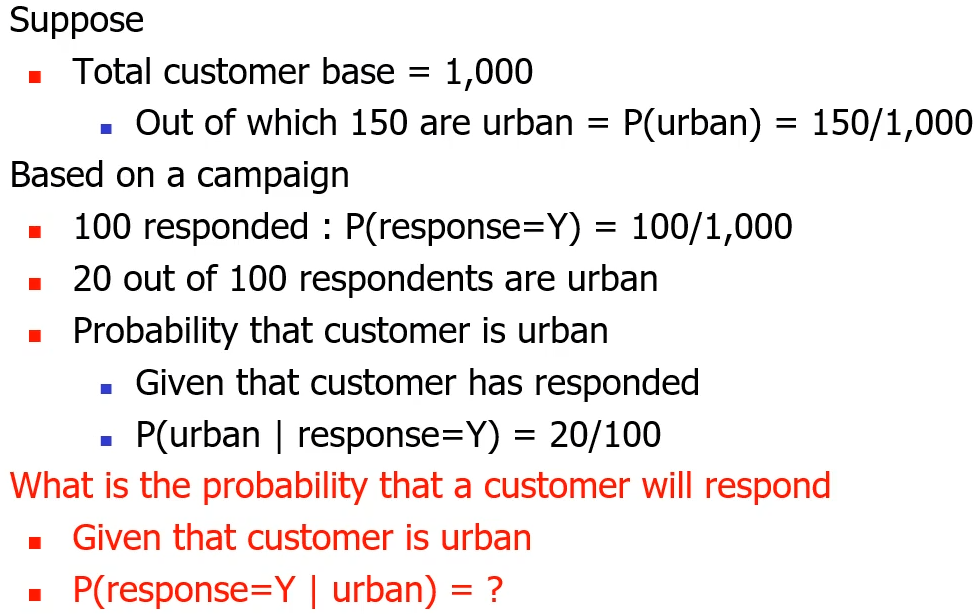

In [63]:
Image("../3. Images/Bayes Predictive Analytics - 1.png", width=500, height=500)

In [64]:
data = {
    'Response [Yes]': [20, 80],
    'Response [No]': [130, 770]
}

df = pd.DataFrame(data, index=['Urban', 'Rural'])
df

Response [Yes]  Response [No]
Urban              20            130
Rural              80            770

In [66]:
print(f"Probability that customer is urban, given that he has responded 'Yes': {conditional_probability(df['Response [Yes]']['Urban'], df['Response [Yes]'].to_list()):.2f}")

Probability that customer is urban, given that he has responded 'Yes': 0.20


In [68]:
# What is the probability that a customer will respond 'Yes' given that he is from an urban area?
# P(Response = Yes | Urban) = P(Urban | Response = Yes) * P(Response = Yes) / P(Urban)

Probability_Urban_given_Yes = conditional_probability(df.loc['Urban', 'Response [Yes]'], df.loc['Urban', :].to_list())
Probability_Urban_given_Yes

0.13333333333333333

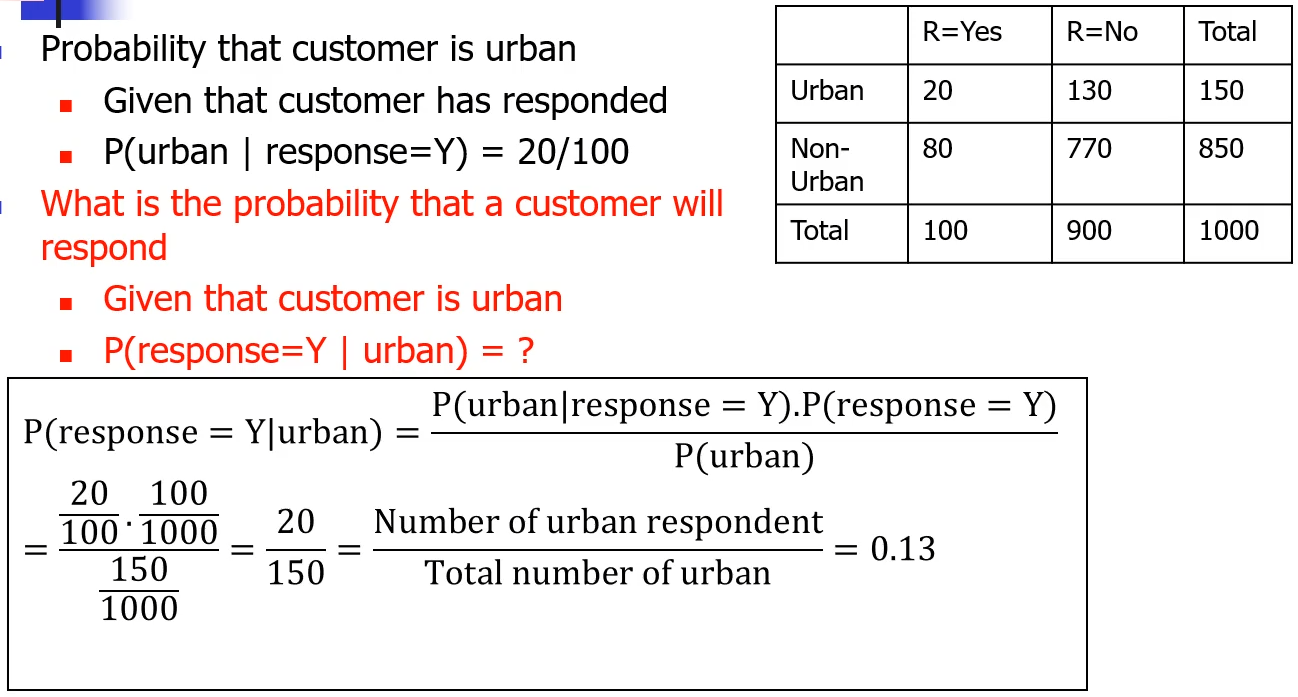

In [69]:
Image("../3. Images/Bayes Predictive Analytics - 2.png", width=500, height=500)

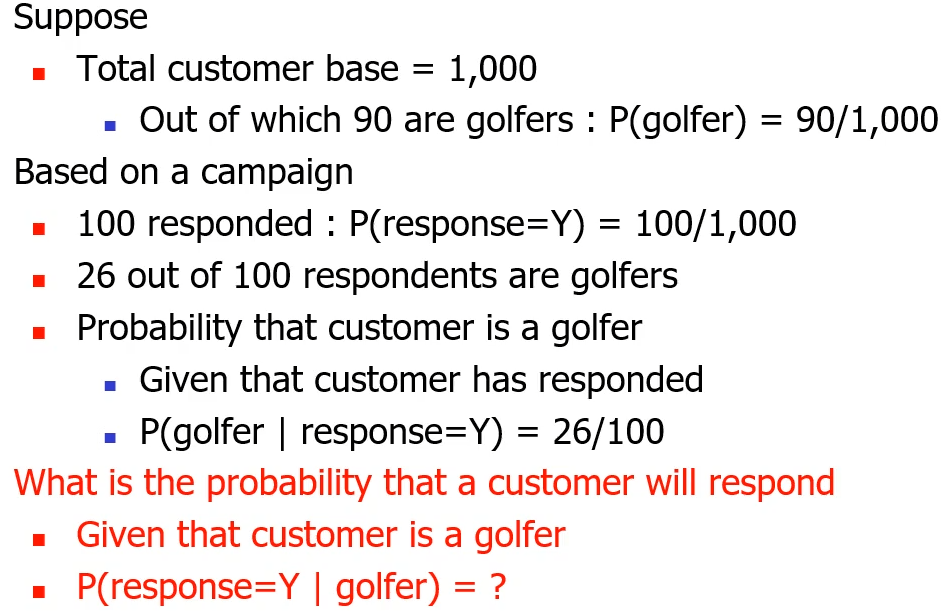

In [70]:
Image("../3. Images/Bayes Predictive Analytics - 3.png", width=500, height=500)

In [71]:
data = {
    'Response [Yes]': [26, 74],
    'Response [No]': [64, 836]
}

df = pd.DataFrame(data, index=['Golfer', 'Not Golfer'])
df

Response [Yes]  Response [No]
Golfer                  26             64
Not Golfer              74            836

In [72]:
print(f"Probability that customer is a golfer, given that he has responded 'Yes': {conditional_probability(df['Response [Yes]']['Golfer'], df['Response [Yes]'].to_list()):.2f}")

Probability that customer is a golfer, given that he has responded 'Yes': 0.26


In [73]:
print(f"The probability of getting a 'Yes' response given that the customer is a golfer is: {conditional_probability(df['Response [Yes]']['Golfer'], df.loc['Golfer', :].to_list()):.2f}")

The probability of getting a 'Yes' response given that the customer is a golfer is: 0.29


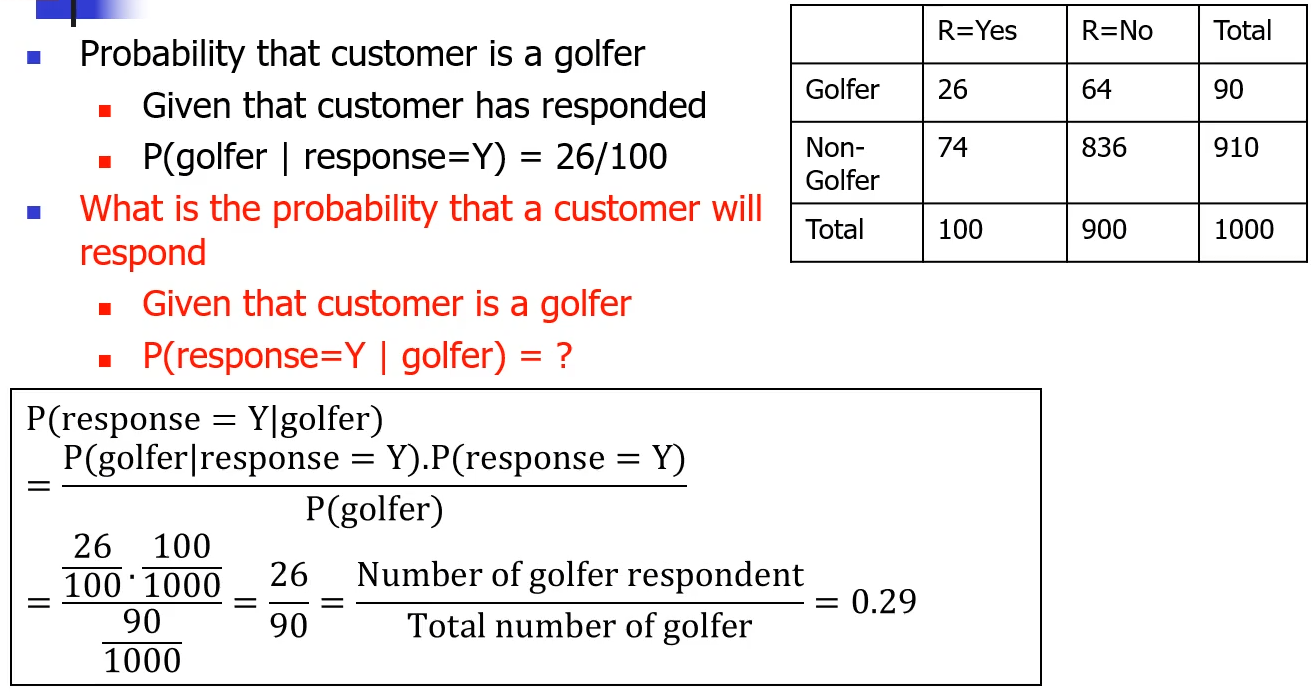

In [74]:
Image("../3. Images/Bayes Predictive Analytics - 4.png", width=500, height=500)

<h4 style = 'color:green'>1.5.1.3 Bayes Theorem - Predictive Analytics - Multiple Conditions</h4>

When we combine both the variables - Golf and Urban, we are able to calculate the probability that a customer will respond 'Yes' given that he is a golfer, and that he is from an urban area.

We make a <b>Naive Assumption that both variables (Golf and Urban) are independent</b>, although we have not established that. To calculate this combined probability, we can separate the calculations into two separate functions and then multiply them together, because we are assuming that both variables are independent.

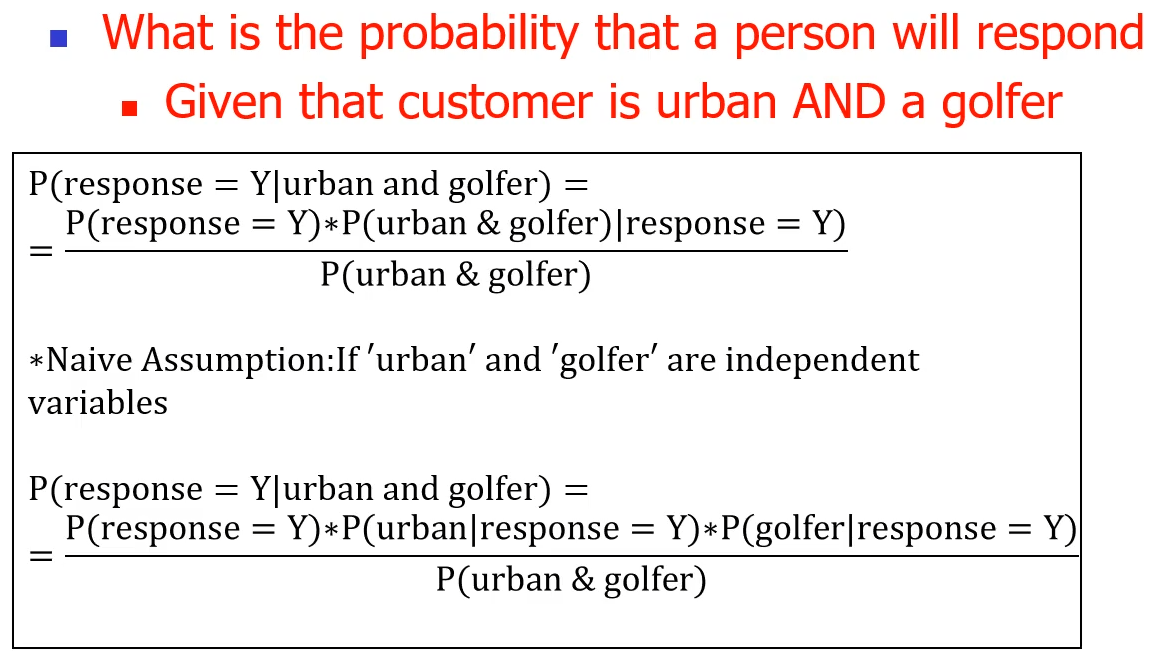

In [75]:
# Multiple Conditions
Image("../3. Images/Bayes Predictive Analytics - 5.png", width=500, height=500)

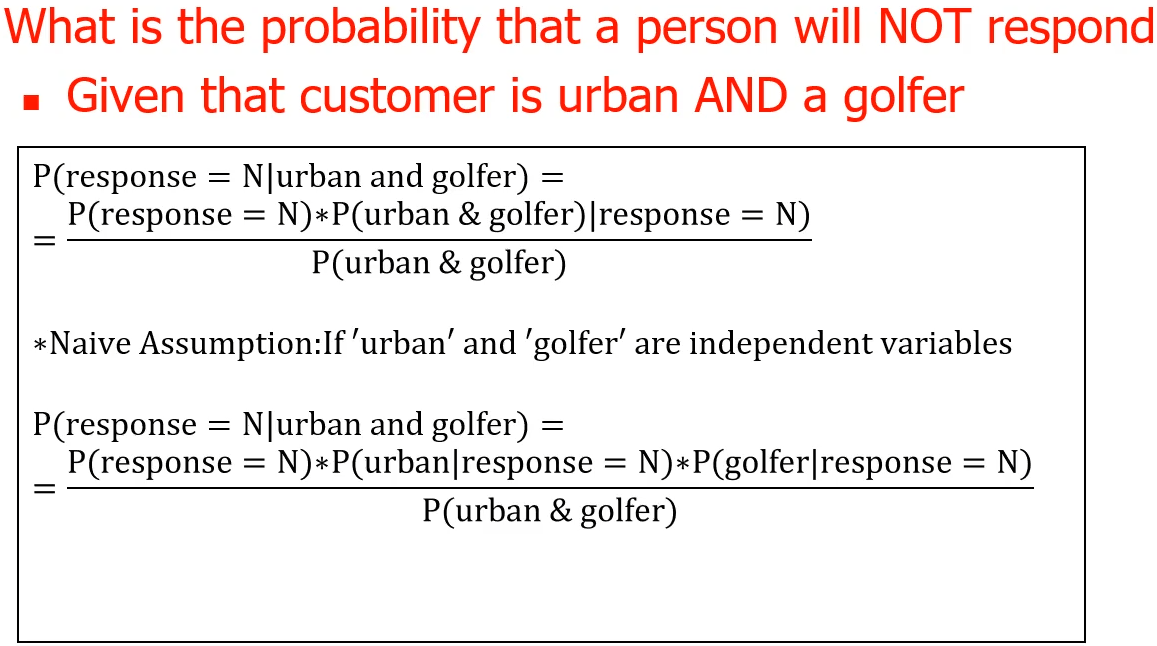

In [76]:
Image("../3. Images/Bayes Predictive Analytics - 6.png", width=500, height=500)

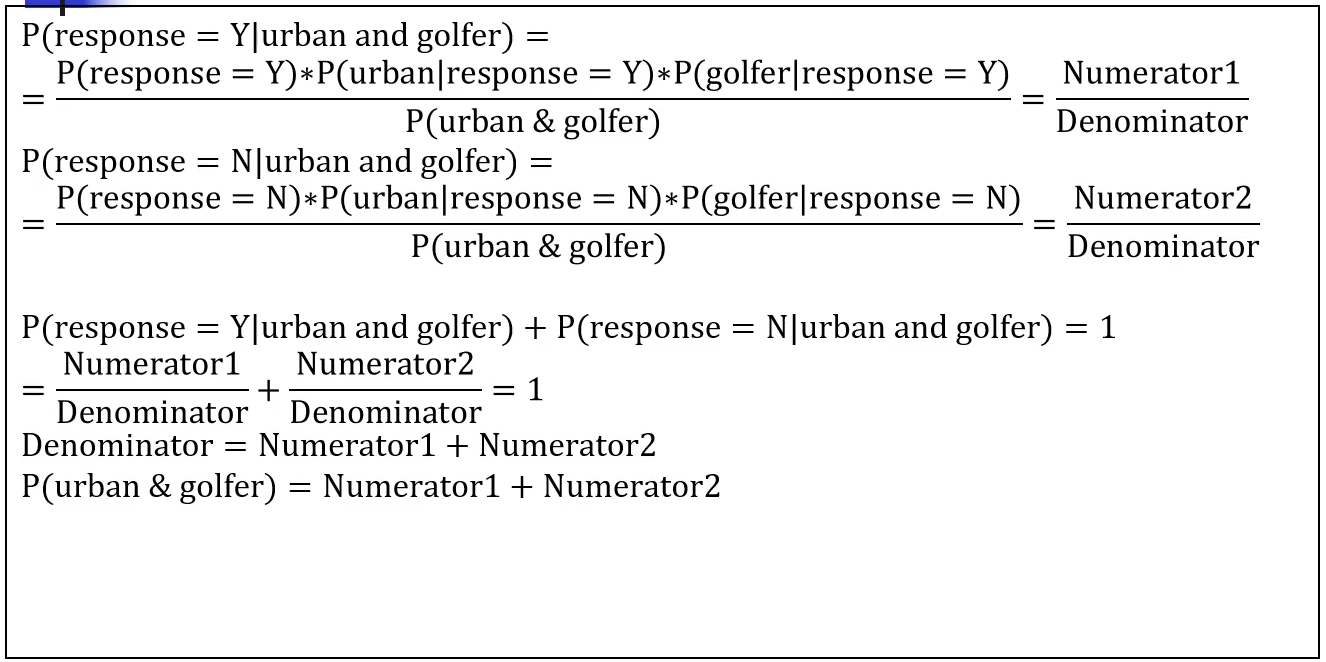

In [77]:
Image("../3. Images/Bayes Predictive Analytics - 7.png", width=500, height=500)

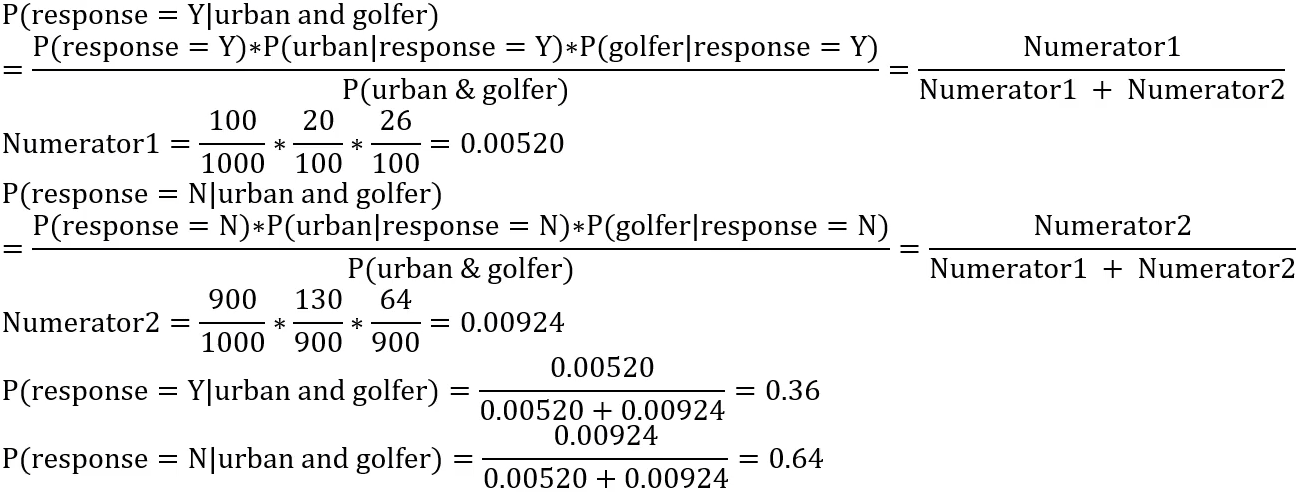

In [78]:
Image("../3. Images/Bayes Predictive Analytics - 8.png", width=500, height=500)

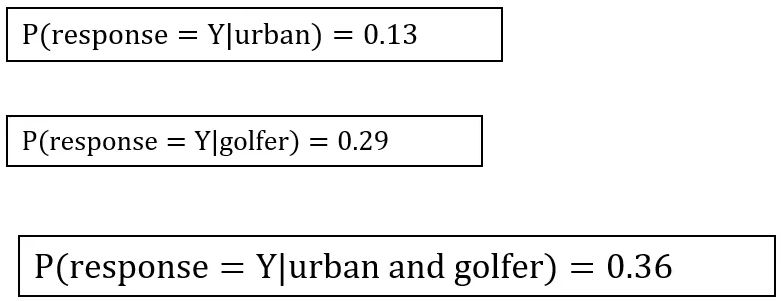

In [79]:
Image("../3. Images/Bayes Predictive Analytics - 9.png", width=500, height=500)

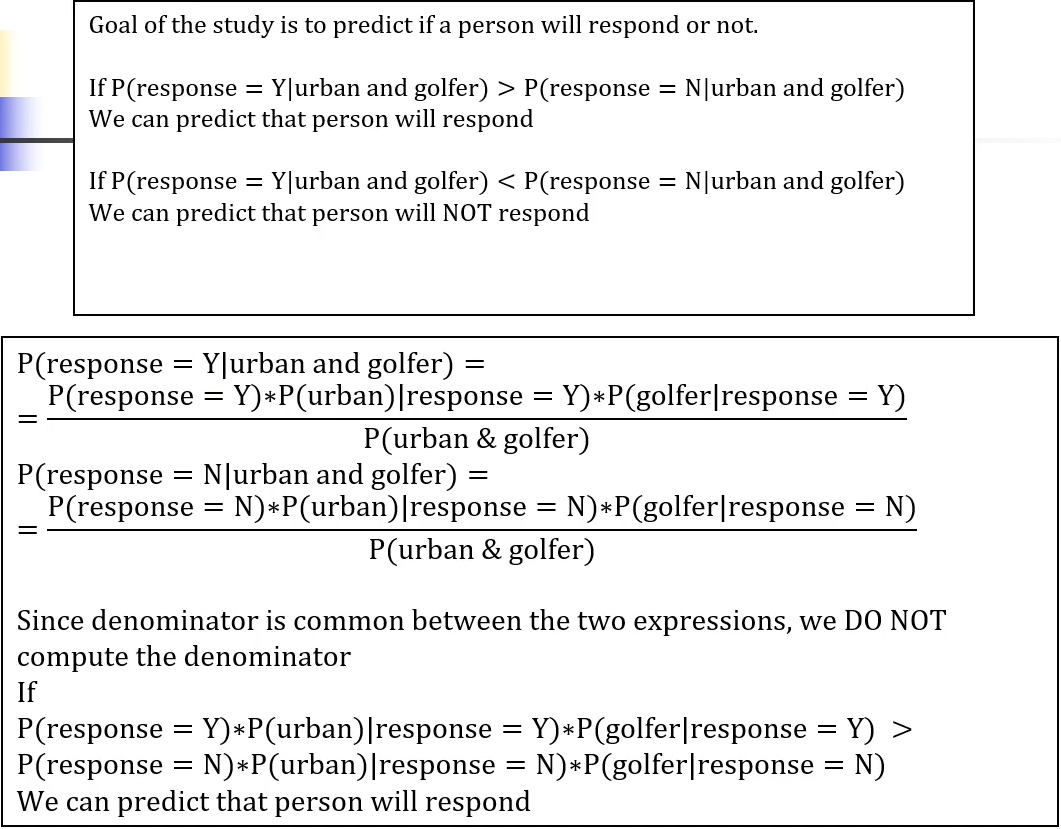

In [80]:
Image("../3. Images/Bayes Predictive Analytics - 10.png", width=500, height=500)

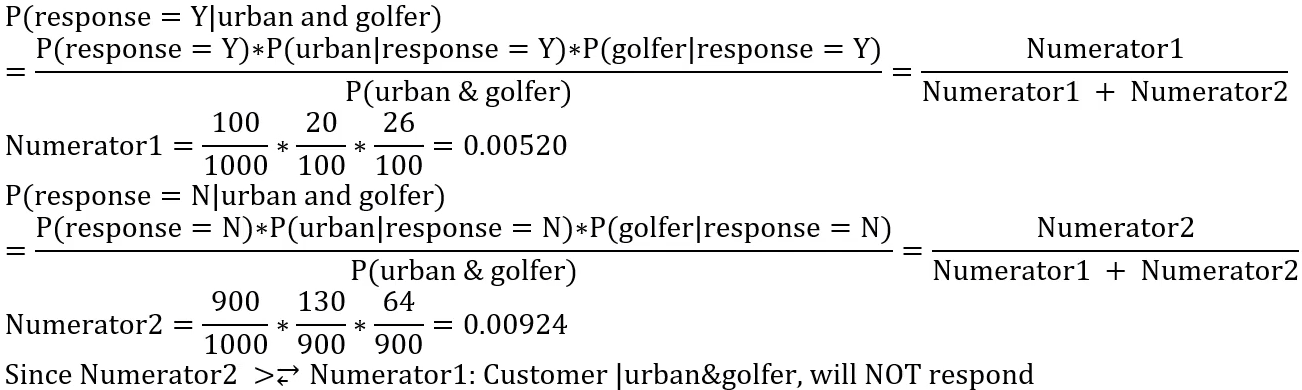

In [81]:
Image("../3. Images/Bayes Predictive Analytics - 11.png", width=500, height=500)

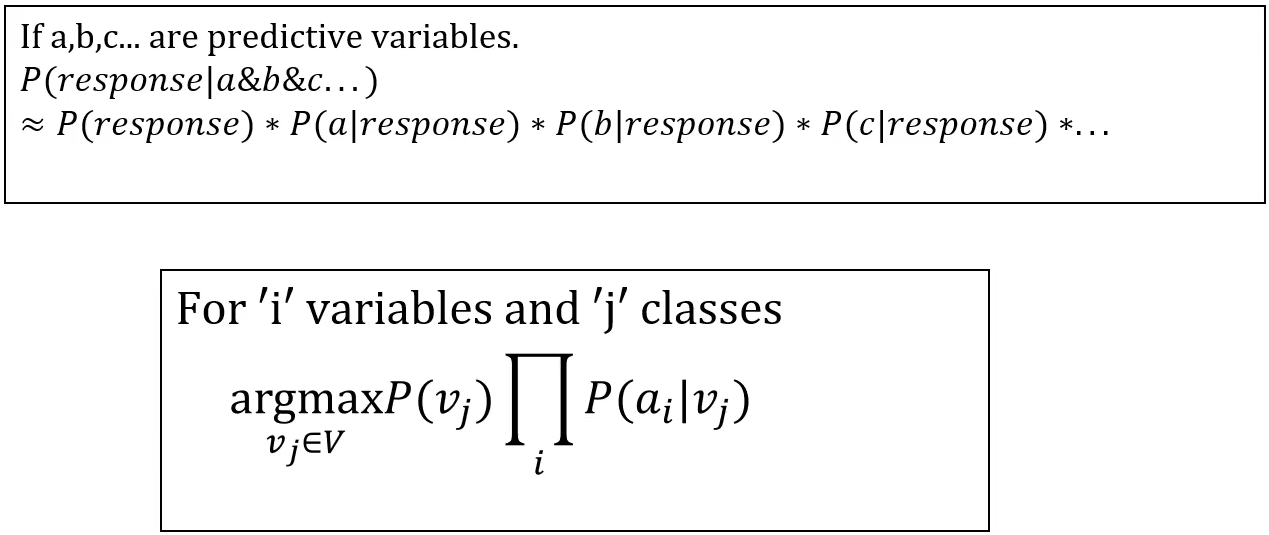

In [82]:
Image("../3. Images/Bayes Predictive Analytics - 12.png", width=500, height=500)

The method is called <b>Naive</b> because we assume that both variables are conditionally independent. In our case, someone is urban is completely independent whether he is a golfer or not, and if they are a golfer, they are completely independent whether he is from an urban area or not.

<h3 style = 'color:lightgreen'>1.5.2 Laplace Smoothing</h3>

<b>Naive Bayes</b> modeling method does not work when any probability is 0 because of lack of data. In such as a case, we use the Laplace smoothing method.

<b>Single Variable Distribution</b>
<ul>
    <li>Simple Probability</li>
    <li>Laplace Smoothing</li>    
</ul>

<b>Two Variables Distribution</b>
<ul>
    <li>Conditional Probability</li>
    <li>Laplace Smoothing</li>    
</ul>

<h4 style = 'color:green'>1.5.2.1 Laplace Smoothing - Single Variable Distribution</h4>

In [83]:
def calculate_probability(value: str, distribution: list) -> float:
    counter = 0
    for _ in distribution:
        if _ == value:
            counter += 1
    return counter / len(distribution)

In [86]:
single_distribution = ['A1', 'A2', 'A1', 'A2', 'A3', 'A1', 'A3', 'A2']
print(f"Probability of A1: {calculate_probability('A1', single_distribution):.3f}")
print(f"Probability of A2: {calculate_probability('A2', single_distribution):.3f}")
print(f"Probability of A3: {calculate_probability('A3', single_distribution):.3f}")
print(f"Probability of A4: {calculate_probability('A4', single_distribution):.3f}")

Probability of A1: 0.375
Probability of A2: 0.375
Probability of A3: 0.250
Probability of A4: 0.000


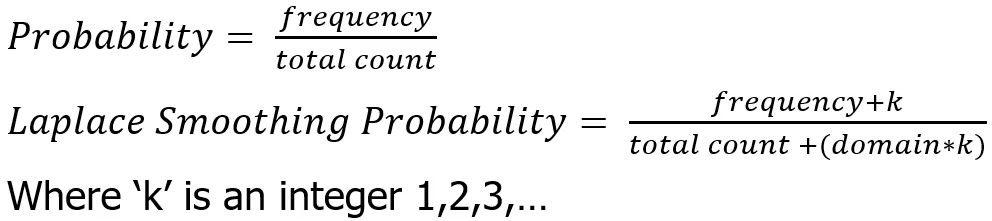

In [87]:
Image("../3. Images/Laplace Smoothing - 1.png", width=500, height=500)

In [90]:
# Let's calculate the Laplace Smoothing for the above distribution

def calculate_laplace_smoothing(value: str, distribution: list, domain, k: int) -> float:
    counter = 0
    for _ in distribution:
        if _ == value:
            counter += 1
    return (counter + k) / (len(distribution) + domain * k)

In [91]:
domain = 4
k = 1
print(f"Laplace Smoothing for A1: {calculate_laplace_smoothing('A1', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A2: {calculate_laplace_smoothing('A2', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A3: {calculate_laplace_smoothing('A3', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A4: {calculate_laplace_smoothing('A4', single_distribution, domain, k):.3f}")

Laplace Smoothing for A1: 0.333
Laplace Smoothing for A2: 0.333
Laplace Smoothing for A3: 0.250
Laplace Smoothing for A4: 0.083


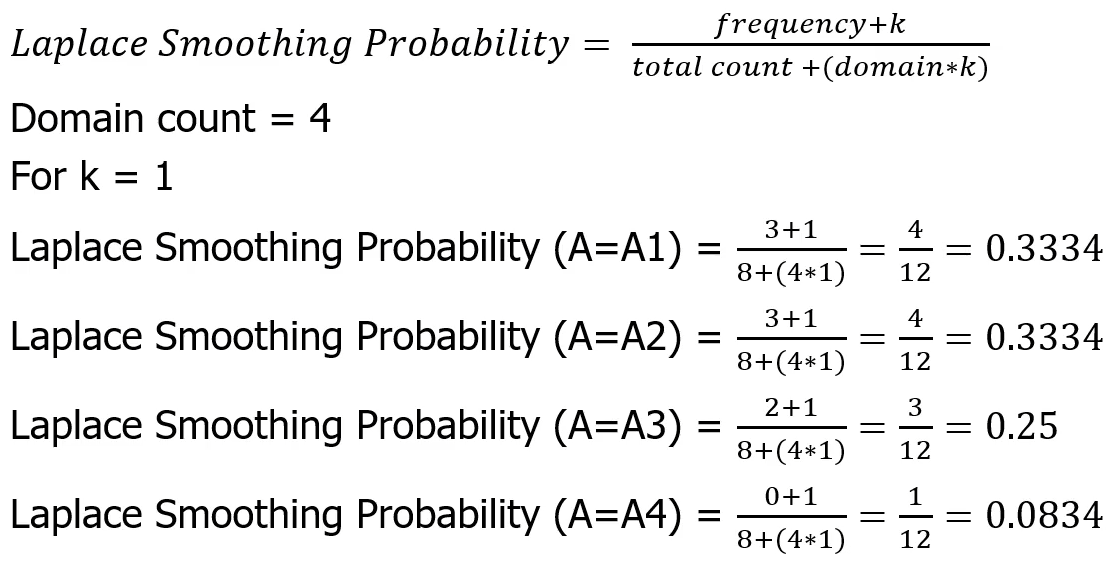

In [92]:
Image("../3. Images/Laplace Smoothing - 2.png", width=500, height=500)

In [93]:
domain = 4
k = 2
print(f"Laplace Smoothing for A1: {calculate_laplace_smoothing('A1', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A2: {calculate_laplace_smoothing('A2', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A3: {calculate_laplace_smoothing('A3', single_distribution, domain, k):.3f}")
print(f"Laplace Smoothing for A4: {calculate_laplace_smoothing('A4', single_distribution, domain, k):.3f}")

Laplace Smoothing for A1: 0.312
Laplace Smoothing for A2: 0.312
Laplace Smoothing for A3: 0.250
Laplace Smoothing for A4: 0.125


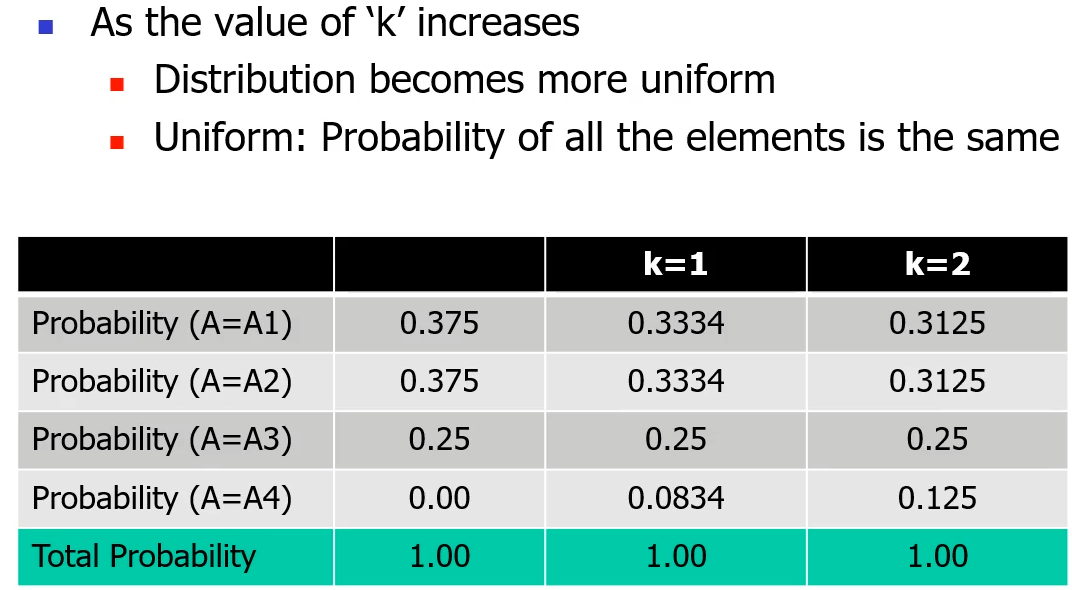

In [94]:
# As the value of k increases, the probability of each value decreases and the distribution becomes uniform.
Image("../3. Images/Laplace Smoothing - 3.png", width=500, height=500)

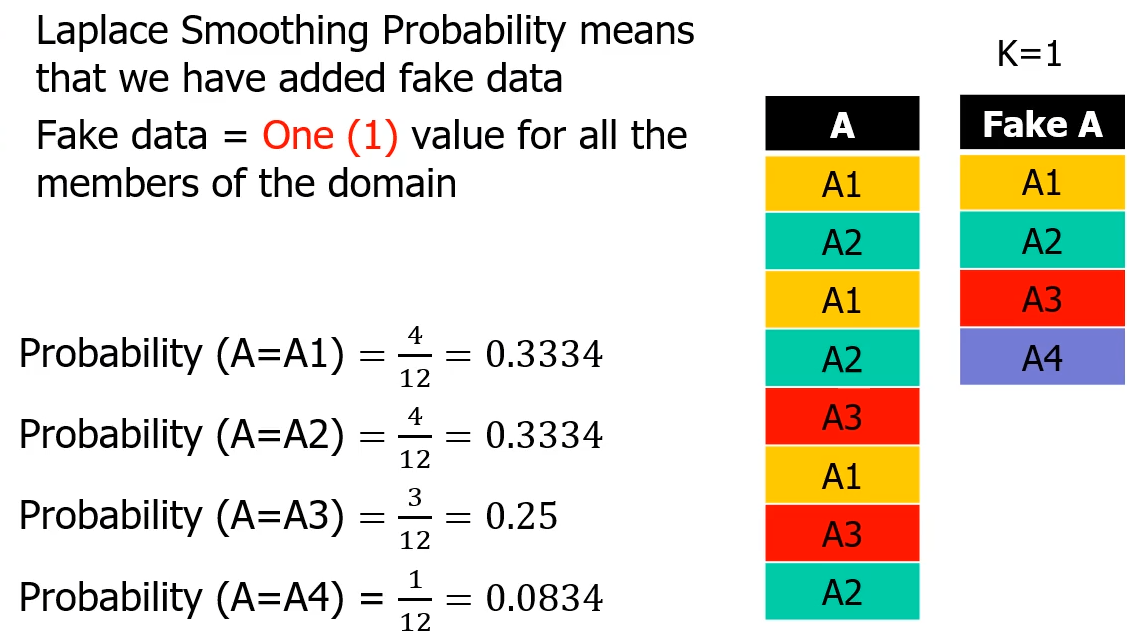

In [95]:
# Laplace Smoothing adds fake data to the distribution to make it more uniform and to avoid overfitting
Image("../3. Images/Laplace Smoothing - 4.png", width=500, height=500)

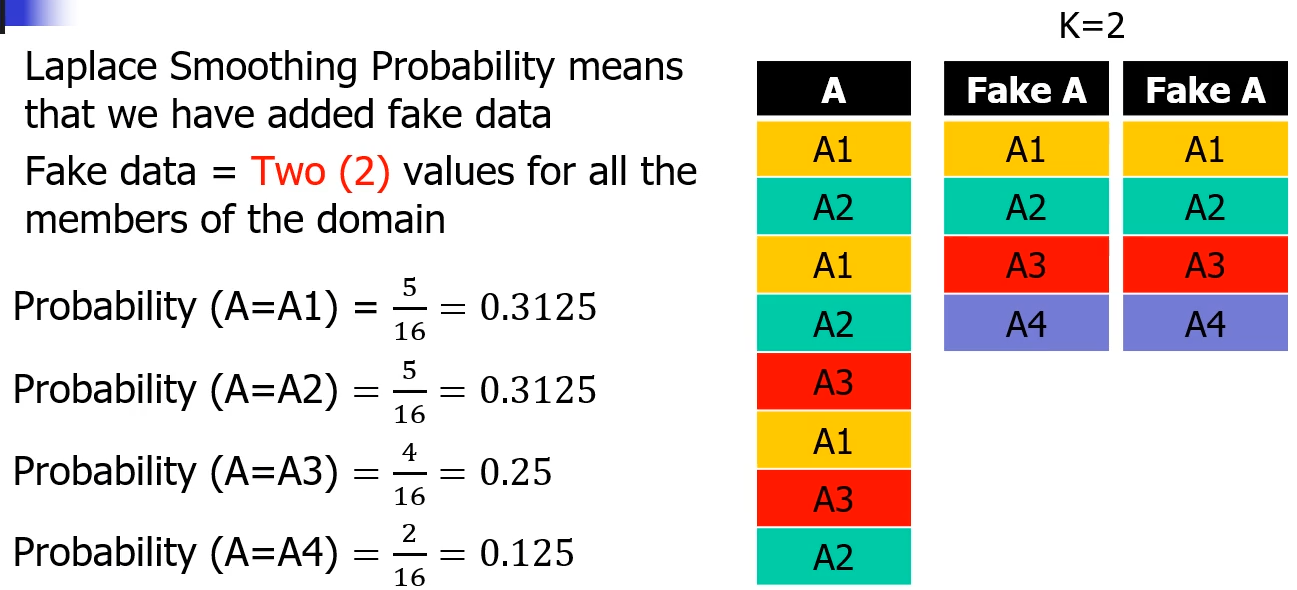

In [96]:
# Adding more fake data
Image("../3. Images/Laplace Smoothing - 5.png", width=500, height=500)

<h4 style = 'color:green'>1.5.2.2 Laplace Smoothing - Multiple Variables Distribution</h4>

In [97]:
distribution_a = ['A1', 'A2', 'A1', 'A1', 'A2', 'A1']
distribution_b = ['B1', 'B2', 'B2', 'B3', 'B2', 'B1']

In [100]:
def calculate_multiple_distribution(value_b1: str, distribution_b: list, given_a: str, distribution_a: list) -> float:
    counter_a = 0
    counter_b = 0
    for i in range(len(distribution_a)):
        if distribution_a[i] == given_a:
            counter_a += 1
            if distribution_b[i] == value_b1:
                counter_b += 1
    return counter_b / counter_a

In [102]:
print(f"Probability of B1 given A1: {calculate_multiple_distribution('B1', distribution_b, 'A1', distribution_a):.3f}")
print(f"Probability of B2 given A1: {calculate_multiple_distribution('B2', distribution_b, 'A1', distribution_a):.3f}")
print(f"Probability of B3 given A1: {calculate_multiple_distribution('B3', distribution_b, 'A1', distribution_a):.3f}")
print(f"Probability of B4 given A1: {calculate_multiple_distribution('B4', distribution_b, 'A1', distribution_a):.3f}")

print(f"Probability of B1 given A2: {calculate_multiple_distribution('B1', distribution_b, 'A2', distribution_a):.3f}")
print(f"Probability of B2 given A2: {calculate_multiple_distribution('B2', distribution_b, 'A2', distribution_a):.3f}")
print(f"Probability of B3 given A2: {calculate_multiple_distribution('B3', distribution_b, 'A2', distribution_a):.3f}")
print(f"Probability of B4 given A2: {calculate_multiple_distribution('B4', distribution_b, 'A2', distribution_a):.3f}")

Probability of B1 given A1: 0.500
Probability of B2 given A1: 0.250
Probability of B3 given A1: 0.250
Probability of B4 given A1: 0.000
Probability of B1 given A2: 0.000
Probability of B2 given A2: 1.000
Probability of B3 given A2: 0.000
Probability of B4 given A2: 0.000


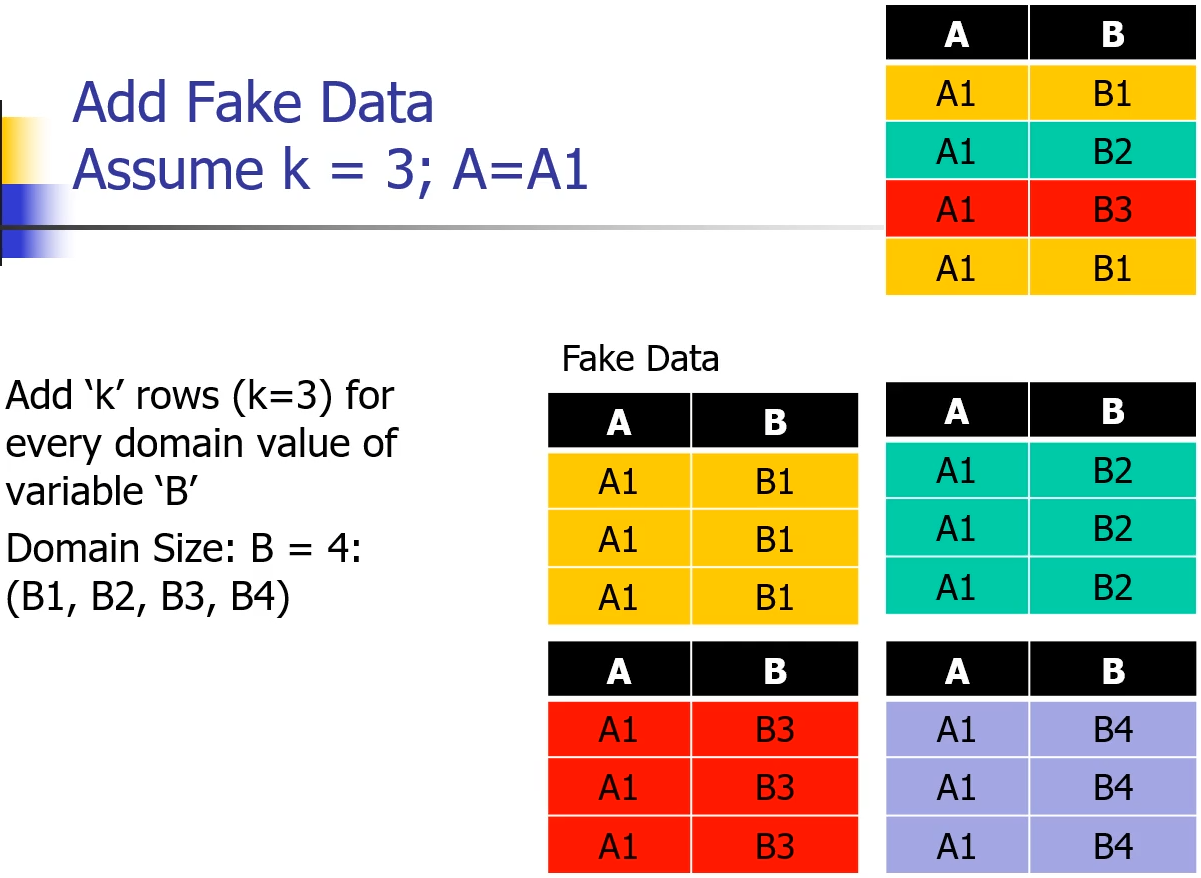

In [103]:
# Adding fake data
Image("../3. Images/Laplace Smoothing - 6.png", width=500, height=500)

In [104]:
def calculate_laplace_smoothing_multiple_distribution(value_b1: str, distribution_b: list, given_a: str, distribution_a: list, domain, k: int) -> float:
    counter_a = 0
    counter_b = 0
    for i in range(len(distribution_a)):
        if distribution_a[i] == given_a:
            counter_a += 1
            if distribution_b[i] == value_b1:
                counter_b += 1
    return (counter_b + k) / (counter_a + domain * k)

In [106]:
domain = 4
k = 3

print(f"Laplace Smoothing for B1 given A1: {calculate_laplace_smoothing_multiple_distribution('B1', distribution_b, 'A1', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B2 given A1: {calculate_laplace_smoothing_multiple_distribution('B2', distribution_b, 'A1', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B3 given A1: {calculate_laplace_smoothing_multiple_distribution('B3', distribution_b, 'A1', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B4 given A1: {calculate_laplace_smoothing_multiple_distribution('B4', distribution_b, 'A1', distribution_a, domain, k):.3f}")

Laplace Smoothing for B1 given A1: 0.312
Laplace Smoothing for B2 given A1: 0.250
Laplace Smoothing for B3 given A1: 0.250
Laplace Smoothing for B4 given A1: 0.188


In [107]:
domain = 4
k = 3

print(f"Laplace Smoothing for B1 given A2: {calculate_laplace_smoothing_multiple_distribution('B1', distribution_b, 'A2', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B2 given A2: {calculate_laplace_smoothing_multiple_distribution('B2', distribution_b, 'A2', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B3 given A2: {calculate_laplace_smoothing_multiple_distribution('B3', distribution_b, 'A2', distribution_a, domain, k):.3f}")
print(f"Laplace Smoothing for B4 given A2: {calculate_laplace_smoothing_multiple_distribution('B4', distribution_b, 'A2', distribution_a, domain, k):.3f}")

Laplace Smoothing for B1 given A2: 0.214
Laplace Smoothing for B2 given A2: 0.357
Laplace Smoothing for B3 given A2: 0.214
Laplace Smoothing for B4 given A2: 0.214


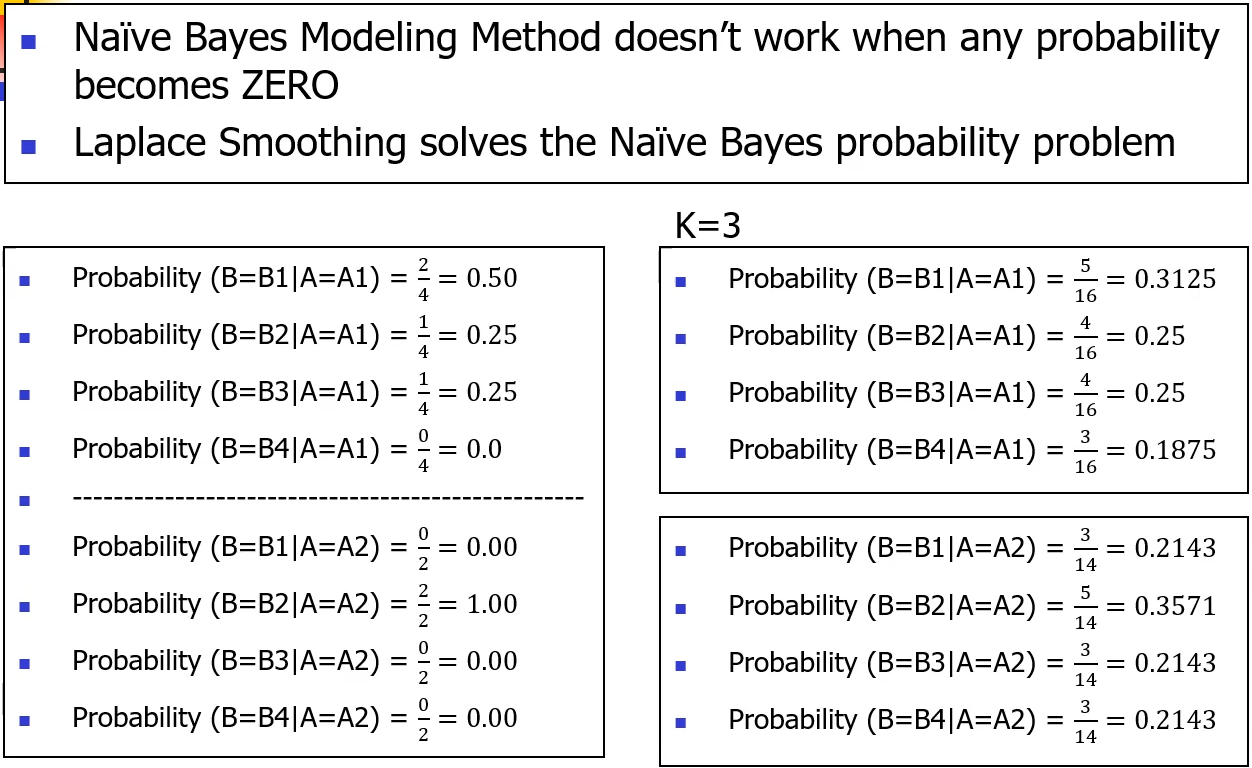

In [108]:
Image("../3. Images/Laplace Smoothing - 7.png", width=500, height=500)

<h3 style = 'color:lightgreen'>1.5.3 Naive Bayes Predictive Analytics</h3>

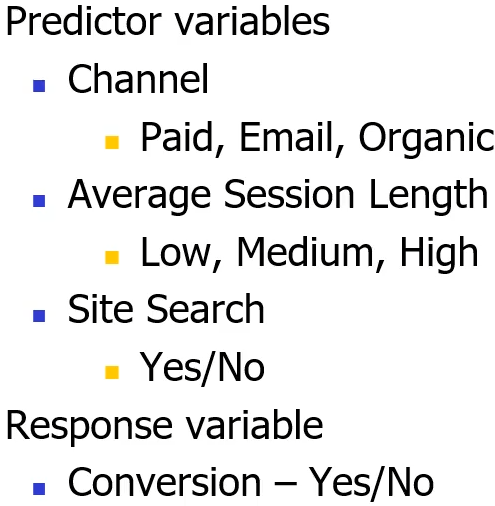

In [109]:
Image("../3. Images/Naive Bayes Classifier - 1.png", width=500, height=500)

In [113]:
# Manually transcribe the data from the provided image into a dataframe
# This is the interpreted data from the image provided

data = {
    "VisitorID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    "Channel": [
        "Paid", "Email", "Organic", "Organic", "Email", "Organic", "Organic", "Organic",
        "Paid", "Organic", "Email", "Organic", "Paid", "Organic", "Organic", "Email",
        "Paid", "Paid", "Email", "Email", "Email", "Organic", "Organic", "Organic", "Email"
    ],
    "Avg_Session_Length_Category": [
        "Medium", "Low", "Medium", "High", "High", "High", "High", "Low",
        "Medium", "Medium", "Low", "Low", "Medium", "Medium", "Medium", "Low",
        "High", "Medium", "Medium", "Medium", "Medium", "High", "Low", "High", "Medium"
    ],
    "Site_Search": [
        "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes",
        "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No"
    ],
    "Conversion": [
        "Yes", "No", "No", "No", "Yes", "No", "No", "Yes",
        "No", "No", "No", "No", "Yes", "Yes", "Yes", "No",
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data).set_index('VisitorID')

df.head()  # Display the first few rows of the dataframe

Channel Avg_Session_Length_Category Site_Search Conversion
VisitorID                                                            
1             Paid                      Medium         Yes        Yes
2            Email                         Low          No         No
3          Organic                      Medium         Yes         No
4          Organic                        High          No         No
5            Email                        High         Yes        Yes

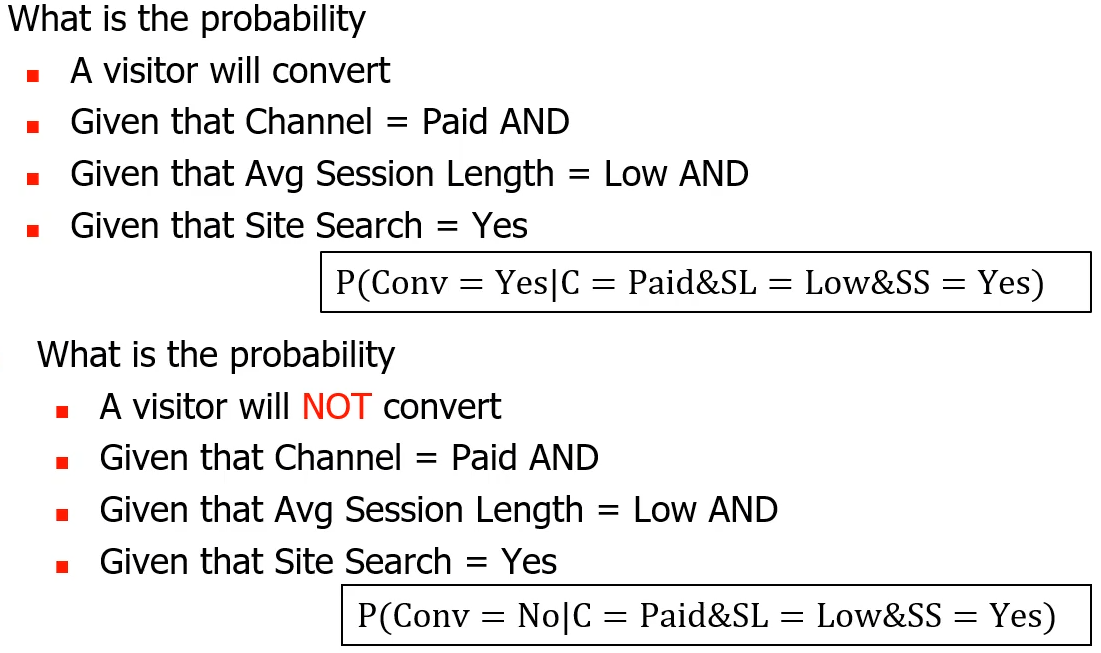

In [114]:
Image("../3. Images/Naive Bayes Classifier - 2.png", width=500, height=500)

In [116]:
# Let's calculate first level probabilities

# P(Conversion = Yes)
Probability_Conversion_Yes = calculate_probability('Yes', df['Conversion'].to_list())
# P(Conversion = No)
Probability_Conversion_No = calculate_probability('No', df['Conversion'].to_list())

# P(Site_Search = Yes)
Probability_Site_Search_Yes = calculate_probability('Yes', df['Site_Search'].to_list())
# P(Site_Search = No)
Probability_Site_Search_No = calculate_probability('No', df['Site_Search'].to_list())

# P(Avg_Session_Length_Category = Low)
Probability_Avg_Session_Length_Category_Low = calculate_probability('Low', df['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = Medium)
Probability_Avg_Session_Length_Category_Medium = calculate_probability('Medium', df['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = High)
Probability_Avg_Session_Length_Category_High = calculate_probability('High', df['Avg_Session_Length_Category'].to_list())

# P(Channel = Paid)
Probability_Channel_Paid = calculate_probability('Paid', df['Channel'].to_list())
# P(Channel = Email)
Probability_Channel_Email = calculate_probability('Email', df['Channel'].to_list())
# P(Channel = Organic)
Probability_Channel_Organic = calculate_probability('Organic', df['Channel'].to_list())

# Display the probabilities
print(f"P(Conversion = Yes): {Probability_Conversion_Yes:.3f}")
print(f"P(Conversion = No): {Probability_Conversion_No:.3f}")
print(f"P(Site_Search = Yes): {Probability_Site_Search_Yes:.3f}")
print(f"P(Site_Search = No): {Probability_Site_Search_No:.3f}")
print(f"P(Avg_Session_Length_Category = Low): {Probability_Avg_Session_Length_Category_Low:.3f}")
print(f"P(Avg_Session_Length_Category = Medium): {Probability_Avg_Session_Length_Category_Medium:.3f}")
print(f"P(Avg_Session_Length_Category = High): {Probability_Avg_Session_Length_Category_High:.3f}")
print(f"P(Channel = Paid): {Probability_Channel_Paid:.3f}")
print(f"P(Channel = Email): {Probability_Channel_Email:.3f}")
print(f"P(Channel = Organic): {Probability_Channel_Organic:.3f}")


P(Conversion = Yes): 0.520
P(Conversion = No): 0.480
P(Site_Search = Yes): 0.640
P(Site_Search = No): 0.360
P(Avg_Session_Length_Category = Low): 0.240
P(Avg_Session_Length_Category = Medium): 0.480
P(Avg_Session_Length_Category = High): 0.280
P(Channel = Paid): 0.200
P(Channel = Email): 0.320
P(Channel = Organic): 0.480


In [117]:
# Let's calculate the conditional probabilit given that the conversion is 'Yes'

# P(Site_Search = Yes | Conversion = Yes)
Probability_Site_Search_Yes_given_Conversion_Yes = calculate_probability('Yes', df[df['Conversion'] == 'Yes']['Site_Search'].to_list())
# P(Site_Search = No | Conversion = Yes)
Probability_Site_Search_No_given_Conversion_Yes = calculate_probability('No', df[df['Conversion'] == 'Yes']['Site_Search'].to_list())

# P(Avg_Session_Length_Category = Low | Conversion = Yes)
Probability_Avg_Session_Length_Category_Low_given_Conversion_Yes = calculate_probability('Low', df[df['Conversion'] == 'Yes']['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = Medium | Conversion = Yes)
Probability_Avg_Session_Length_Category_Medium_given_Conversion_Yes = calculate_probability('Medium', df[df['Conversion'] == 'Yes']['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = High | Conversion = Yes)
Probability_Avg_Session_Length_Category_High_given_Conversion_Yes = calculate_probability('High', df[df['Conversion'] == 'Yes']['Avg_Session_Length_Category'].to_list())

# P(Channel = Paid | Conversion = Yes)
Probability_Channel_Paid_given_Conversion_Yes = calculate_probability('Paid', df[df['Conversion'] == 'Yes']['Channel'].to_list())
# P(Channel = Email | Conversion = Yes)
Probability_Channel_Email_given_Conversion_Yes = calculate_probability('Email', df[df['Conversion'] == 'Yes']['Channel'].to_list())
# P(Channel = Organic | Conversion = Yes)
Probability_Channel_Organic_given_Conversion_Yes = calculate_probability('Organic', df[df['Conversion'] == 'Yes']['Channel'].to_list())

# Display the probabilities
print(f"P(Site_Search = Yes | Conversion = Yes): {Probability_Site_Search_Yes_given_Conversion_Yes:.3f}")
print(f"P(Site_Search = No | Conversion = Yes): {Probability_Site_Search_No_given_Conversion_Yes:.3f}")
print(f"P(Avg_Session_Length_Category = Low | Conversion = Yes): {Probability_Avg_Session_Length_Category_Low_given_Conversion_Yes:.3f}")
print(f"P(Avg_Session_Length_Category = Medium | Conversion = Yes): {Probability_Avg_Session_Length_Category_Medium_given_Conversion_Yes:.3f}")
print(f"P(Avg_Session_Length_Category = High | Conversion = Yes): {Probability_Avg_Session_Length_Category_High_given_Conversion_Yes:.3f}")
print(f"P(Channel = Paid | Conversion = Yes): {Probability_Channel_Paid_given_Conversion_Yes:.3f}")
print(f"P(Channel = Email | Conversion = Yes): {Probability_Channel_Email_given_Conversion_Yes:.3f}")
print(f"P(Channel = Organic | Conversion = Yes): {Probability_Channel_Organic_given_Conversion_Yes:.3f}")




P(Site_Search = Yes | Conversion = Yes): 0.923
P(Site_Search = No | Conversion = Yes): 0.077
P(Avg_Session_Length_Category = Low | Conversion = Yes): 0.077
P(Avg_Session_Length_Category = Medium | Conversion = Yes): 0.692
P(Avg_Session_Length_Category = High | Conversion = Yes): 0.231
P(Channel = Paid | Conversion = Yes): 0.308
P(Channel = Email | Conversion = Yes): 0.385
P(Channel = Organic | Conversion = Yes): 0.308


In [118]:
# Let's calculate the conditional probabilit given that the conversion is 'No'

# P(Site_Search = Yes | Conversion = No)
Probability_Site_Search_Yes_given_Conversion_No = calculate_probability('Yes', df[df['Conversion'] == 'No']['Site_Search'].to_list())
# P(Site_Search = No | Conversion = No)
Probability_Site_Search_No_given_Conversion_No = calculate_probability('No', df[df['Conversion'] == 'No']['Site_Search'].to_list())

# P(Avg_Session_Length_Category = Low | Conversion = No)
Probability_Avg_Session_Length_Category_Low_given_Conversion_No = calculate_probability('Low', df[df['Conversion'] == 'No']['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = Medium | Conversion = No)
Probability_Avg_Session_Length_Category_Medium_given_Conversion_No = calculate_probability('Medium', df[df['Conversion'] == 'No']['Avg_Session_Length_Category'].to_list())
# P(Avg_Session_Length_Category = High | Conversion = No)
Probability_Avg_Session_Length_Category_High_given_Conversion_No = calculate_probability('High', df[df['Conversion'] == 'No']['Avg_Session_Length_Category'].to_list())

# P(Channel = Paid | Conversion = No)
Probability_Channel_Paid_given_Conversion_No = calculate_probability('Paid', df[df['Conversion'] == 'No']['Channel'].to_list())
# P(Channel = Email | Conversion = No)
Probability_Channel_Email_given_Conversion_No = calculate_probability('Email', df[df['Conversion'] == 'No']['Channel'].to_list())
# P(Channel = Organic | Conversion = No)
Probability_Channel_Organic_given_Conversion_No = calculate_probability('Organic', df[df['Conversion'] == 'No']['Channel'].to_list())

# Display the probabilities
print(f"P(Site_Search = Yes | Conversion = No): {Probability_Site_Search_Yes_given_Conversion_No:.3f}")
print(f"P(Site_Search = No | Conversion = No): {Probability_Site_Search_No_given_Conversion_No:.3f}")
print(f"P(Avg_Session_Length_Category = Low | Conversion = No): {Probability_Avg_Session_Length_Category_Low_given_Conversion_No:.3f}")
print(f"P(Avg_Session_Length_Category = Medium | Conversion = No): {Probability_Avg_Session_Length_Category_Medium_given_Conversion_No:.3f}")
print(f"P(Avg_Session_Length_Category = High | Conversion = No): {Probability_Avg_Session_Length_Category_High_given_Conversion_No:.3f}")
print(f"P(Channel = Paid | Conversion = No): {Probability_Channel_Paid_given_Conversion_No:.3f}")
print(f"P(Channel = Email | Conversion = No): {Probability_Channel_Email_given_Conversion_No:.3f}")
print(f"P(Channel = Organic | Conversion = No): {Probability_Channel_Organic_given_Conversion_No:.3f}")


P(Site_Search = Yes | Conversion = No): 0.333
P(Site_Search = No | Conversion = No): 0.667
P(Avg_Session_Length_Category = Low | Conversion = No): 0.417
P(Avg_Session_Length_Category = Medium | Conversion = No): 0.250
P(Avg_Session_Length_Category = High | Conversion = No): 0.333
P(Channel = Paid | Conversion = No): 0.083
P(Channel = Email | Conversion = No): 0.250
P(Channel = Organic | Conversion = No): 0.667


In [120]:
# Numerator Calculation
# If we want to find the probability of a Conversion given a set of conditions, we can use the Naive Bayes Classifier to calculate the probability

# P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid)
Probability_Conversion_Yes_given_Conditions = (Probability_Site_Search_Yes_given_Conversion_Yes * 
                                               Probability_Avg_Session_Length_Category_Low_given_Conversion_Yes * 
                                               Probability_Channel_Paid_given_Conversion_Yes) * Probability_Conversion_Yes

# P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid)
Probability_Conversion_No_given_Conditions = (Probability_Site_Search_Yes_given_Conversion_No * 
                                              Probability_Avg_Session_Length_Category_Low_given_Conversion_No * 
                                              Probability_Channel_Paid_given_Conversion_No) * Probability_Conversion_No

# Display the probabilities
print(f"P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): {Probability_Conversion_Yes_given_Conditions:.10f}")
print(f"P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): {Probability_Conversion_No_given_Conditions:.10f}")

P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): 0.0113609467
P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): 0.0055555556


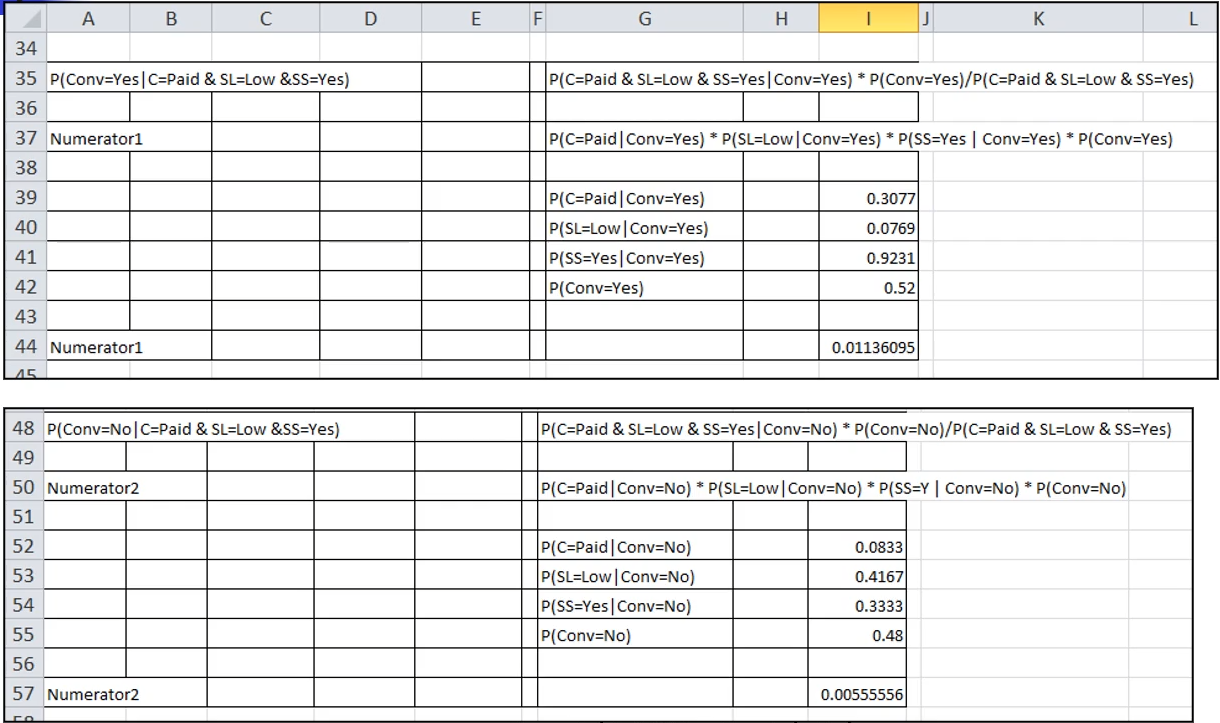

In [126]:
Image("../3. Images/Naive Bayes Classifier - 3.png", width=500, height=500)

In [127]:
# Final Bayes Calculation - Numerator / (Numerator + Denominator)

# P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid)
Probability_Calculation_Bayes_1 = (Probability_Conversion_Yes_given_Conditions / (Probability_Conversion_Yes_given_Conditions + Probability_Conversion_No_given_Conditions))

# P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid)
Probability_Calculation_Bayes_2 = (Probability_Conversion_No_given_Conditions / (Probability_Conversion_Yes_given_Conditions + Probability_Conversion_No_given_Conditions))

# Display the probabilities
print(f"P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): {Probability_Calculation_Bayes_1:.10f}")
print(f"P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): {Probability_Calculation_Bayes_2:.10f}")

P(Conversion = Yes | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): 0.6715895841
P(Conversion = No | Site_Search = Yes, Avg_Session_Length_Category = Low, Channel = Paid): 0.3284104159


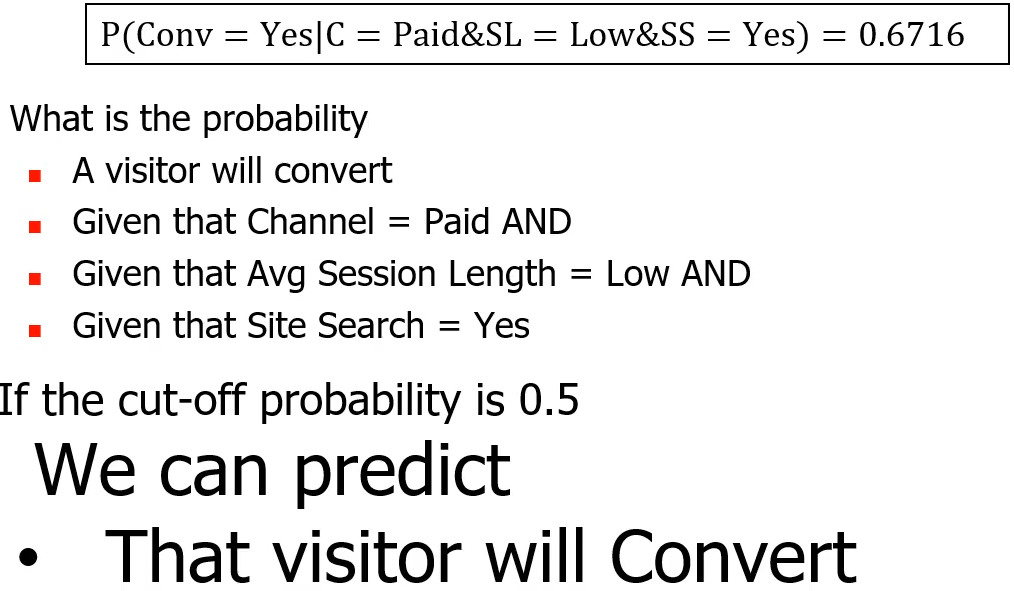

In [125]:
Image("../3. Images/Naive Bayes Classifier - 4.png", width=500, height=500)

<h3 style = 'color:lightgreen'>1.5.4 NLP with Naive Bayes</h3>

<b>Naive Bayes</b> are mostly used in NLP to predict the tag of a text. They calculate the probability of each tag for a given text and then output the tag with the highest one. This method is used for Natural Language Processing, such as - 

<ul>
    <li>Which documents are of interest</li>
    <li>Classify documents based on interest - E.g., Taxes, Sports, Religion, Politics, etc.</li>
    <li>Email is junk or not</li>
    <li>Sentiment Analysis - E.g., Tweet is positive or negative, or customer review is positive or negative</li>
</ul>

When using Naive Bayes, there are two key assumptions:

<ul>
    <li>Bag of Words: The position of the words does not matter</li>
    <li>Feature Probabilities are independent given the class 'c'</li>
</ul>

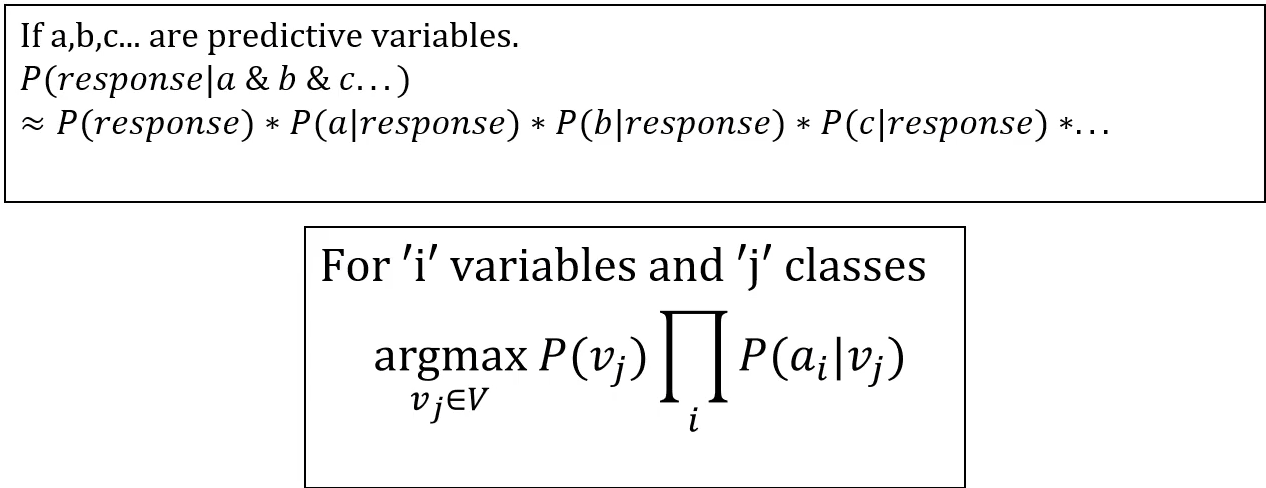

In [128]:
Image("../3. Images/Naive Bayes Classifier - 5.png", width=500, height=500)

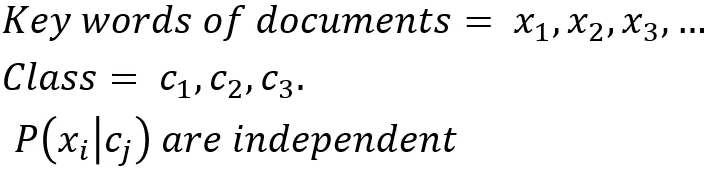

In [129]:
Image("../3. Images/Naive Bayes Classifier - 6.png", width=500, height=500)

In [130]:
data = {
    'Sentence': ['You loved the movie', 'You hated the movie', 'One great movie. good movie', 'poor acting', 'great acting, one good movie'],
    'Class': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)
df

Sentence     Class
0           You loved the movie  Positive
1           You hated the movie  Negative
2   One great movie. good movie  Positive
3                   poor acting  Negative
4  great acting, one good movie  Positive

In [131]:
test_X = ['You hated the poor acting']
test_y = ['Negative']

In [133]:
cv = CountVectorizer()

In [134]:
X = cv.fit_transform(df['Sentence'])
print(cv.get_feature_names_out())

['acting' 'good' 'great' 'hated' 'loved' 'movie' 'one' 'poor' 'the' 'you']


In [135]:
df_all = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
df_all['Class'] = df['Class']
df_all

acting  good  great  hated  loved  movie  one  poor  the  you     Class
0       0     0      0      0      1      1    0     0    1    1  Positive
1       0     0      0      1      0      1    0     0    1    1  Negative
2       0     1      1      0      0      2    1     0    0    0  Positive
3       1     0      0      0      0      0    0     1    0    0  Negative
4       1     1      1      0      0      1    1     0    0    0  Positive

In [136]:
# Compute First Level Probabilities

# P(Class = Positive)
Probability_Class_Positive = calculate_probability('Positive', df['Class'].to_list())
# P(Class = Negative)
Probability_Class_Negative = calculate_probability('Negative', df['Class'].to_list())

# Display the probabilities
print(f"P(Class = Positive): {Probability_Class_Positive:.3f}")
print(f"P(Class = Negative): {Probability_Class_Negative:.3f}")

P(Class = Positive): 0.600
P(Class = Negative): 0.400


In [149]:
# Probability of each word in the positive class
def calculate_word_probability_using_laplace_smoothing(word_count: int, vocab_size: int, total_words: int, k: int) -> float:
    return (word_count + k) / (total_words + vocab_size * k)

In [138]:
df_positive = df_all[df_all['Class'] == 'Positive'].dropna(axis=1)
df_negative = df_all[df_all['Class'] == 'Negative'].dropna(axis=1)

In [158]:
# Calculate the sum of each word in the positive class
df_positive_sum = df_positive.sum()
# Convert to df
df_positive_sum = df_positive_sum.to_frame().reset_index()
df_positive_sum.columns = ['Word', 'Count']
df_positive_sum = df_positive_sum.drop(df_positive_sum[df_positive_sum['Word'] == 'Class'].index)
# df_positive_sum.drop(df_positive_sum[df_positive_sum['Count'] == 0].index, inplace=True)
df_positive_sum


Word Count
0  acting     1
1    good     2
2   great     2
3   hated     0
4   loved     1
5   movie     4
6     one     2
7    poor     0
8     the     1
9     you     1

In [159]:
# Calculate the probability of each word in the positive class
vocab_positive = len(df_positive_sum['Word'].to_list())
k = 1
total_words_positive = df_positive_sum['Count'].sum()

df_positive_sum['Probability'] = df_positive_sum.apply(lambda row: calculate_word_probability_using_laplace_smoothing(row['Count'], vocab_positive, total_words_positive, k), axis=1)
df_positive_sum

Word Count  Probability
0  acting     1     0.083333
1    good     2     0.125000
2   great     2     0.125000
3   hated     0     0.041667
4   loved     1     0.083333
5   movie     4     0.208333
6     one     2     0.125000
7    poor     0     0.041667
8     the     1     0.083333
9     you     1     0.083333

In [160]:
# Calculate the sum of each word in the negative class
df_negative_sum = df_negative.sum()
# Convert to df
df_negative_sum = df_negative_sum.to_frame().reset_index()
df_negative_sum.columns = ['Word', 'Count']
df_negative_sum = df_negative_sum.drop(df_negative_sum[df_negative_sum['Word'] == 'Class'].index)
# df_negative_sum.drop(df_negative_sum[df_negative_sum['Count'] == 0].index, inplace=True)
df_negative_sum


Word Count
0  acting     1
1    good     0
2   great     0
3   hated     1
4   loved     0
5   movie     1
6     one     0
7    poor     1
8     the     1
9     you     1

In [161]:
# Calculate the probability of each word in the negative class
vocab_negative = len(df_negative_sum['Word'].to_list())
k = 1
total_words_negative = df_negative_sum['Count'].sum()

df_negative_sum['Probability'] = df_negative_sum.apply(lambda row: calculate_word_probability_using_laplace_smoothing(row['Count'], vocab_negative, total_words_negative, k), axis=1)
df_negative_sum

Word Count  Probability
0  acting     1       0.1250
1    good     0       0.0625
2   great     0       0.0625
3   hated     1       0.1250
4   loved     0       0.0625
5   movie     1       0.1250
6     one     0       0.0625
7    poor     1       0.1250
8     the     1       0.1250
9     you     1       0.1250

In [163]:
# Calculate probability of the test sentence

test_sentence = 'You hated the poor acting'
test_sentence = cv.transform([test_sentence])
print(test_sentence.toarray())

df_test = pd.DataFrame(test_sentence.toarray(), columns=cv.get_feature_names_out())
df_test

[[1 0 0 1 0 0 0 1 1 1]]


acting  good  great  hated  loved  movie  one  poor  the  you
0       1     0      0      1      0      0    0     1    1    1

In [166]:
# Calculate the probability of the test sentence given the positive class
probability_test_sentence_given_positive = 1
for word in df_test.columns:
    if word in df_positive_sum['Word'].to_list():
        probability_test_sentence_given_positive *= df_positive_sum[df_positive_sum['Word'] == word]['Probability'].values[0]
    else:
        probability_test_sentence_given_positive *= calculate_word_probability_using_laplace_smoothing(0, vocab_positive, total_words_positive, k)

# Calculate the probability of the test sentence given the negative class
probability_test_sentence_given_negative = 1
for word in df_test.columns:
    if word in df_negative_sum['Word'].to_list():
        probability_test_sentence_given_negative *= df_negative_sum[df_negative_sum['Word'] == word]['Probability'].values[0]
    else:
        probability_test_sentence_given_negative *= calculate_word_probability_using_laplace_smoothing(0, vocab_negative, total_words_negative, k)

# Display the probabilities (Positive)
print(f"P(Test Sentence | Positive): {probability_test_sentence_given_positive:.10f}")
print(f"P(Test Sentence | Negative): {probability_test_sentence_given_negative:.10f}")

# Calculate the final Bayes probability
probability_test_sentence_positive = (probability_test_sentence_given_positive * Probability_Class_Positive) / ((probability_test_sentence_given_positive * Probability_Class_Positive) + 
                                                                                                                (probability_test_sentence_given_negative * Probability_Class_Negative))

# Display the probabilities
print(f"P(Positive | Test Sentence): {probability_test_sentence_positive:.10f}")

# Calculate the final Bayes probability (Negative)
probability_test_sentence_negative = (probability_test_sentence_given_negative * Probability_Class_Negative) / ((probability_test_sentence_given_positive * Probability_Class_Positive) + 
                                                                                                                (probability_test_sentence_given_negative * Probability_Class_Negative))

# Display the probabilities
print(f"P(Negative | Test Sentence): {probability_test_sentence_negative:.10f}")

# Final Prediction
if probability_test_sentence_positive > probability_test_sentence_negative:
    print("The test sentence is Positive")
else:
    print("The test sentence is Negative")


P(Test Sentence | Positive): 0.0000000000
P(Test Sentence | Negative): 0.0000000001
P(Positive | Test Sentence): 0.4674945215
P(Negative | Test Sentence): 0.5325054785
The test sentence is Negative
